In [1]:
# ==========================================
# 📦 Dispersion Morphometrics:
# A Creative Atlas of Box Plot Variants
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(21)

# Create sample dataset
df_box = pd.DataFrame({
    "Group A": np.random.normal(0, 1, 100),
    "Group B": np.random.normal(1, 1.2, 100),
    "Group C": np.random.normal(-0.5, 0.8, 100),
    "Group D": np.random.normal(2, 0.5, 100),
})


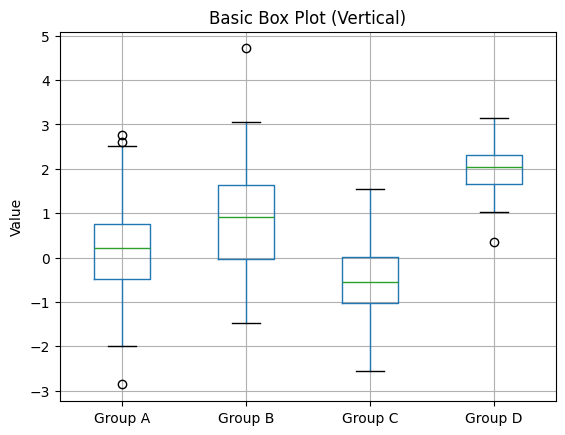

In [2]:
plt.figure()
df_box.boxplot()
plt.title("Basic Box Plot (Vertical)")
plt.ylabel("Value")
plt.show()


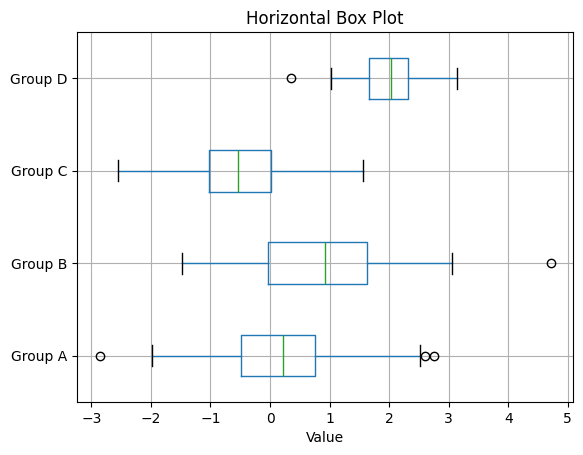

In [3]:
plt.figure()
df_box.boxplot(vert=False)
plt.title("Horizontal Box Plot")
plt.xlabel("Value")
plt.show()


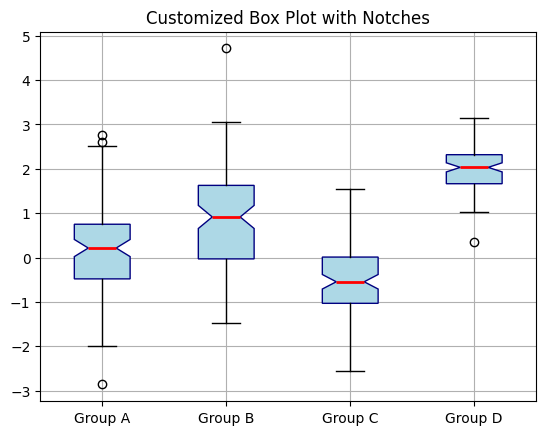

In [4]:
plt.figure()
df_box.boxplot(notch=True, patch_artist=True,
               boxprops=dict(facecolor="lightblue", color="navy"),
               medianprops=dict(color="red", linewidth=2),
               whiskerprops=dict(color="black"))
plt.title("Customized Box Plot with Notches")
plt.show()


/tmp/ipython-input-2803402868.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_multi, labels=["Dist1", "Dist2", "Dist3", "Dist4"])


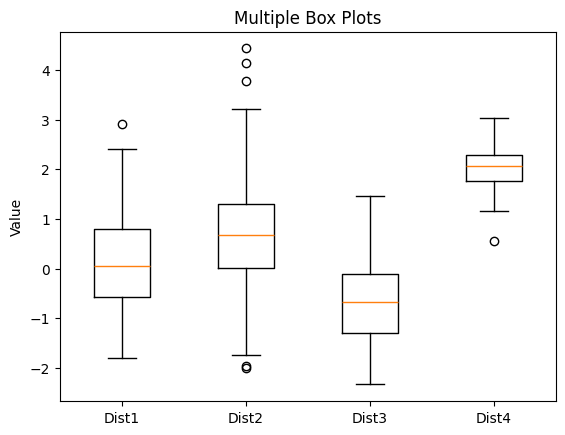

In [5]:
data_multi = [np.random.normal(loc, scale, 100) for loc, scale in [(0,1), (1,1.2), (-0.5,0.8), (2,0.5)]]

plt.figure()
plt.boxplot(data_multi, labels=["Dist1", "Dist2", "Dist3", "Dist4"])
plt.title("Multiple Box Plots")
plt.ylabel("Value")
plt.show()


<Figure size 640x480 with 0 Axes>

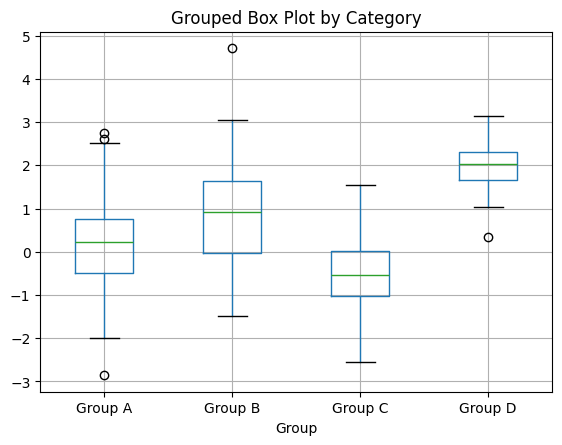

In [6]:
# Melt for grouping
df_long = df_box.melt(var_name="Group", value_name="Value")

plt.figure()
df_long.boxplot(by="Group", column="Value")
plt.title("Grouped Box Plot by Category")
plt.suptitle("")  # remove auto title
plt.show()


/tmp/ipython-input-3530689264.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df_box[c] for c in df_box.columns], labels=df_box.columns, patch_artist=True)


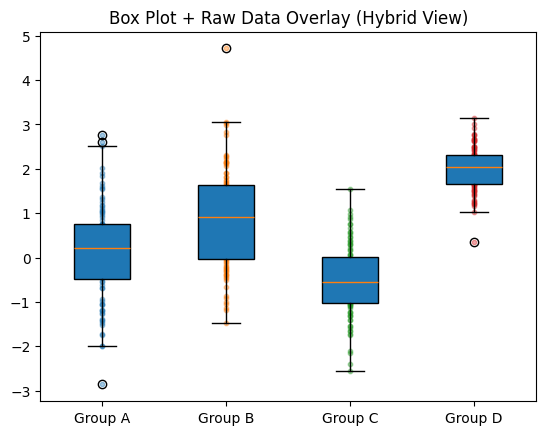

In [7]:
plt.figure()
plt.boxplot([df_box[c] for c in df_box.columns], labels=df_box.columns, patch_artist=True)
for i, col in enumerate(df_box.columns, 1):
    plt.scatter([i]*len(df_box[col]), df_box[col], alpha=0.4, s=10)
plt.title("Box Plot + Raw Data Overlay (Hybrid View)")
plt.show()


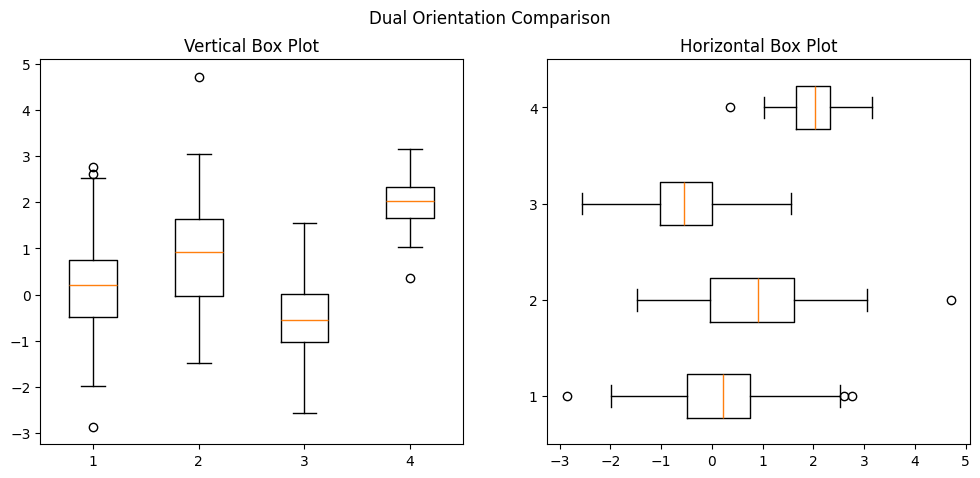

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].boxplot(df_box.values)
axes[0].set_title("Vertical Box Plot")

axes[1].boxplot(df_box.values, vert=False)
axes[1].set_title("Horizontal Box Plot")

plt.suptitle("Dual Orientation Comparison")
plt.show()


In [9]:
# ==========================================
# 🎻 Violin Morphometrics:
# Hybrid Density & Box Visualizations
# ==========================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(99)

# New dataset for violin plots
df_violin = pd.DataFrame({
    "Group A": np.random.normal(0, 1, 200),
    "Group B": np.random.normal(1, 1.2, 200),
    "Group C": np.random.normal(-0.5, 0.8, 200),
    "Group D": np.random.normal(2, 0.5, 200),
})


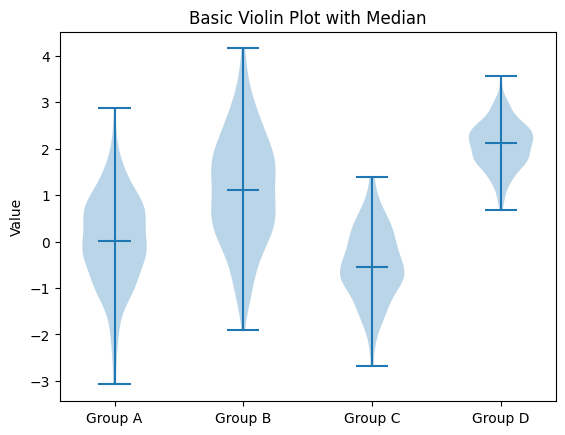

In [10]:
plt.figure()
plt.violinplot(df_violin.values, showmeans=False, showmedians=True)
plt.xticks(np.arange(1, len(df_violin.columns)+1), df_violin.columns)
plt.title("Basic Violin Plot with Median")
plt.ylabel("Value")
plt.show()


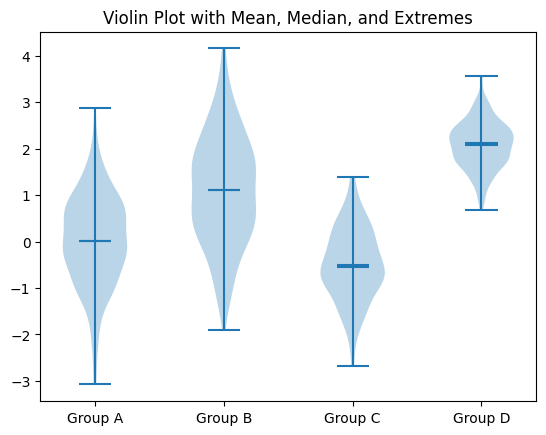

In [11]:
plt.figure()
plt.violinplot(df_violin.values, showmeans=True, showmedians=True, showextrema=True)
plt.xticks(np.arange(1, len(df_violin.columns)+1), df_violin.columns)
plt.title("Violin Plot with Mean, Median, and Extremes")
plt.show()


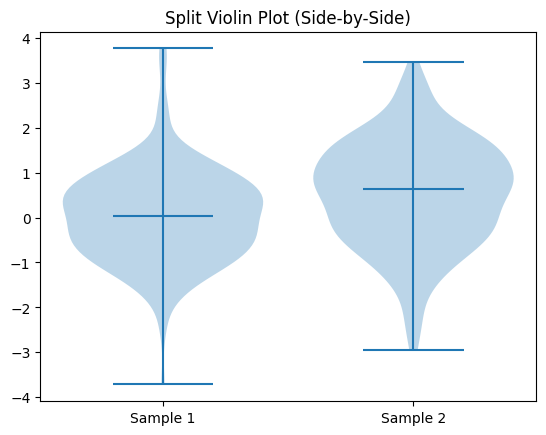

In [12]:
data1 = np.random.normal(0, 1, 200)
data2 = np.random.normal(0.5, 1.1, 200)

plt.figure()
plt.violinplot([data1, data2], positions=[1,2], widths=0.8, showmedians=True)
plt.xticks([1,2], ["Sample 1", "Sample 2"])
plt.title("Split Violin Plot (Side-by-Side)")
plt.show()


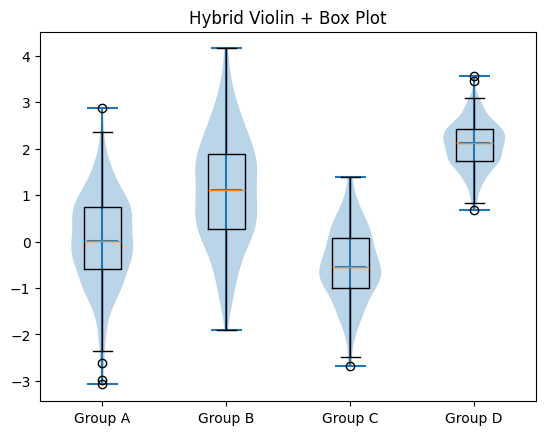

In [13]:
plt.figure()
parts = plt.violinplot(df_violin.values, showmeans=False, showmedians=True)

# Overlay a box plot for clarity
plt.boxplot(df_violin.values, positions=np.arange(1, len(df_violin.columns)+1), widths=0.3)

plt.xticks(np.arange(1, len(df_violin.columns)+1), df_violin.columns)
plt.title("Hybrid Violin + Box Plot")
plt.show()


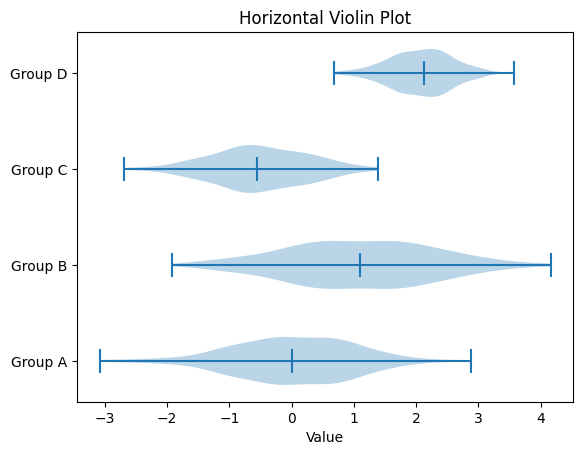

In [14]:
plt.figure()
plt.violinplot(df_violin.values, vert=False, showmeans=False, showmedians=True)
plt.yticks(np.arange(1, len(df_violin.columns)+1), df_violin.columns)
plt.title("Horizontal Violin Plot")
plt.xlabel("Value")
plt.show()



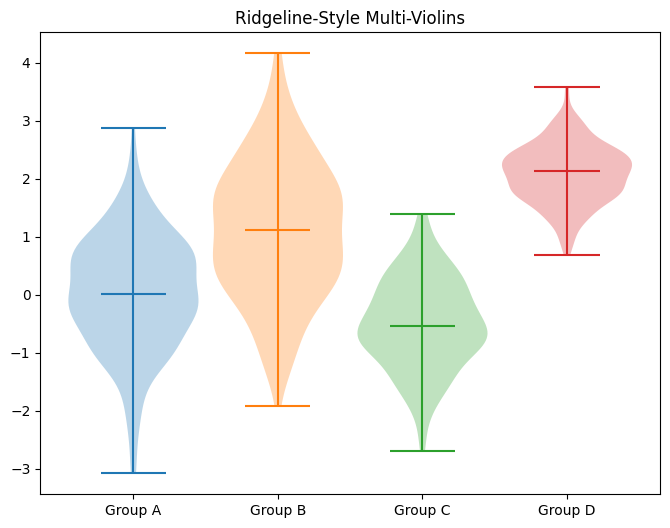

In [15]:
plt.figure(figsize=(8,6))
offset = 0
for i, col in enumerate(df_violin.columns):
    plt.violinplot(df_violin[col], positions=[i], widths=0.9, showmedians=True)
plt.xticks(np.arange(len(df_violin.columns)), df_violin.columns)
plt.title("Ridgeline-Style Multi-Violins")
plt.show()


In [16]:
# Install Plotly if not available
!pip install plotly

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

np.random.seed(101)

# Sample dataset
df_violin = pd.DataFrame({
    "Group": np.repeat(["A", "B", "C", "D"], 200),
    "Value": np.concatenate([
        np.random.normal(0, 1, 200),
        np.random.normal(1, 1.2, 200),
        np.random.normal(-0.5, 0.8, 200),
        np.random.normal(2, 0.5, 200),
    ])
})
df_violin.head()


,Group,Value
0,A,2.706850
1,A,0.628133
2,A,0.907969
3,A,0.503826
4,A,0.651118


In [17]:
fig = px.violin(df_violin, x="Group", y="Value", box=True, points="all")
fig.update_layout(title="Interactive Violin Plot with Box + Points")
fig.show()


In [18]:
fig = px.violin(df_violin, y="Group", x="Value", box=True, points="all", orientation="h")
fig.update_layout(title="Horizontal Interactive Violin Plot")
fig.show()


In [22]:
import plotly.graph_objects as go

# Two subgroups for each Group
groups = df_violin["Group"].unique()
fig = go.Figure()

for g in groups:
    male_vals = df_violin[(df_violin["Group"] == g) & (df_violin["Subgroup"] == "Male")]["Value"]
    female_vals = df_violin[(df_violin["Group"] == g) & (df_violin["Subgroup"] == "Female")]["Value"]

    # Male on left side
    fig.add_trace(go.Violin(
        x=[g]*len(male_vals),
        y=male_vals,
        legendgroup="Male",
        scalegroup=g,
        name="Male",
        side="negative",   # left side
        line_color="blue",
        box_visible=True,
        meanline_visible=True
    ))

    # Female on right side
    fig.add_trace(go.Violin(
        x=[g]*len(female_vals),
        y=female_vals,
        legendgroup="Female",
        scalegroup=g,
        name="Female",
        side="positive",   # right side
        line_color="red",
        box_visible=True,
        meanline_visible=True
    ))

fig.update_traces(points="all", jitter=0.05, scalemode="count")
fig.update_layout(title="Split Violin Plot (Male vs Female)", violingap=0, violinmode="overlay")
fig.show()


In [20]:
fig = px.violin(df_violin, x="Value", y="Group", color="Group", orientation="h", box=True, points=False)
fig.update_traces(side="positive")  # stack in ridgeline fashion
fig.update_layout(title="Interactive Ridgeline-Style Violins")
fig.show()


In [21]:
fig = go.Figure()

# Violin per group
for g in df_violin["Group"].unique():
    subset = df_violin[df_violin["Group"] == g]["Value"]
    fig.add_trace(go.Violin(
        y=subset,
        name=f"Group {g}",
        box_visible=True,
        meanline_visible=True,
        points="all"
    ))

fig.update_layout(title="Advanced Interactive Violin Plot with KDE Density")
fig.show()
